# Titanic:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Do a complete analysis on what sorts of people were likely to survive. 

- We have Train and Test Data in different files.

- We will import both Data, combine them for EDA and Data Cleaning.

- We will then Seperate the Train and Test Data, Build and Evaluate the Model Using Train Data and and make Final Predictions on Test Data.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [136]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [139]:
train.shape

(891, 12)

In [140]:
test.shape

(418, 11)

### Combining Data:

In [141]:
# If we have all values for "Survived" in Train data, we can combine Train and Test Data as it is.

# We will Seperate the Data after Using values from "Survived" as all Rows from Test Data will have NaN in "Survived".

In [142]:
train["Survived"].isna().sum()

0

In [143]:
# Combining Train and Test Data:

df = pd.concat([train, test], axis= 0)

In [144]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [145]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Missing Values Treatment:

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df["PassengerId"].nunique()

1309

In [148]:
# "PassengerId", "Name" and "Ticket" are Unique for Each Observation.

# We can Drop Them as they are not required for Prediction of Survival.

In [149]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis= 1)

In [150]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,1.0,1,female,38.0,1,0,71.2833,C85,C
2,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,1.0,1,female,35.0,1,0,53.1000,C123,S
4,0.0,3,male,35.0,0,0,8.0500,NaN,S


In [151]:
df.isna().sum() / len(df) * 100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

In [152]:
df.isna().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [153]:
# We Won't Touch "Survived" Column as it has Missing Values just because that Rows are from Test Data.

In [154]:
# "Cabin" has More than 75% of Data Missing.

# We can Drop this Feature.

In [155]:
df = df.drop("Cabin", axis= 1)

In [156]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [157]:
# For "Age", let's Check Relation of "Age" to other Features:

df.corr()["Age"]

Survived   -0.077221
Pclass     -0.408106
Age         1.000000
SibSp      -0.243699
Parch      -0.150917
Fare        0.178740
Name: Age, dtype: float64

In [158]:
# "Age" has Relatively High Negative Correlation with "Pcalss".

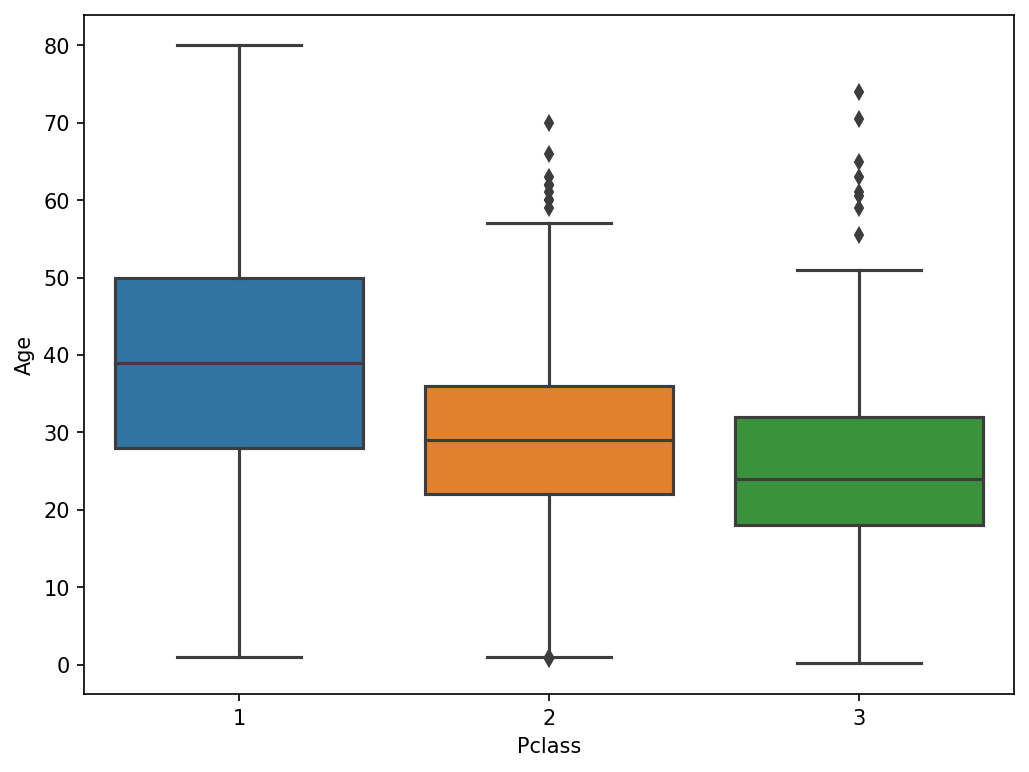

In [159]:
plt.figure(figsize= (8,6), dpi= 150)

sns.boxplot(data= df, x="Pclass", y= "Age")

plt.show()

In [160]:
# We can see that Younger People are in Lower Class and as Age Increases, People Tend to be in Upper Classes.

# So, We will Fill Missing Values in "Age" according To "Pclass" of that Person.

# i.e., if "Age" is Missing for Person in "Pclass" = 1, we will fill that "Age" value with Mean Age of "Pclass"=1.

In [161]:
df.groupby("Pclass").mean()["Age"]

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [162]:
def fill_age(age, Class):
    
    if pd.isna(age):
        if Class == 1:
            return 39
        elif Class == 2:
            return 30
        else:
            return 25
    else:
        return age

In [163]:
df["Age"] = np.vectorize(fill_age)(df["Age"], df["Pclass"])

In [164]:
df["Age"].isna().sum()

0

In [165]:
# "Embarked" and "Fare" has 2 and "1" missing values.

# We can drop these rows.

In [166]:
df = df.dropna(subset=["Embarked", "Fare"])

In [167]:
df.shape

(1306, 8)

In [168]:
df.isna().sum()

Survived    417
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

### EDA:

In [170]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


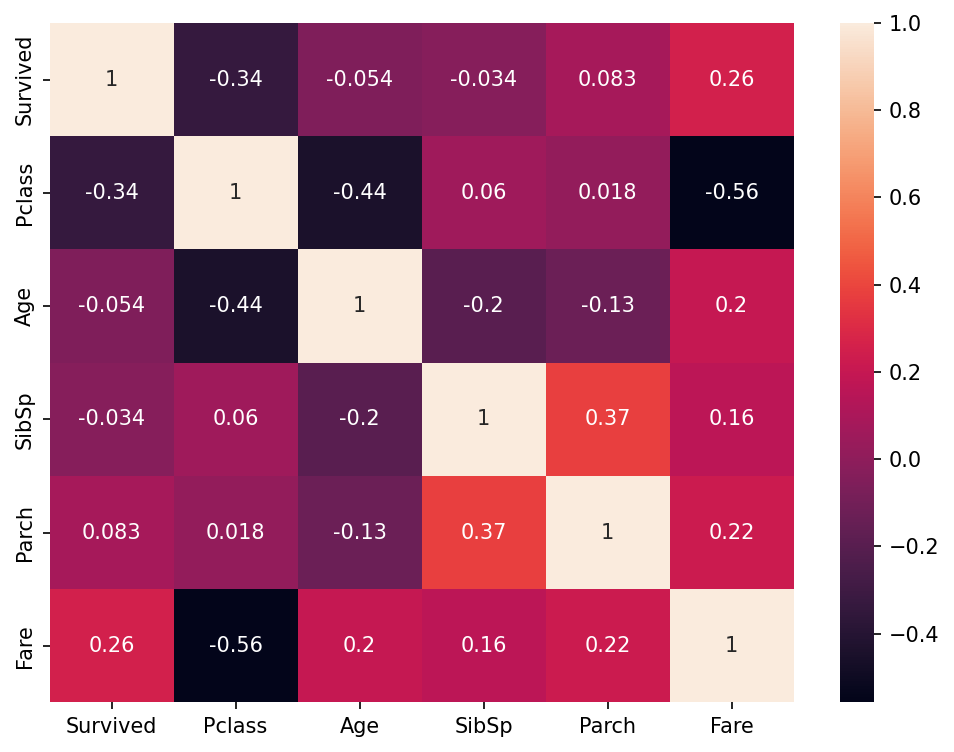

In [171]:
# Relationship between Features and Target:

plt.figure(figsize= (8,6), dpi= 150)

sns.heatmap(data= df.corr(), annot= True)

plt.show()

In [ ]:
# No Significantly High or Low Negative or Positive Correlation.

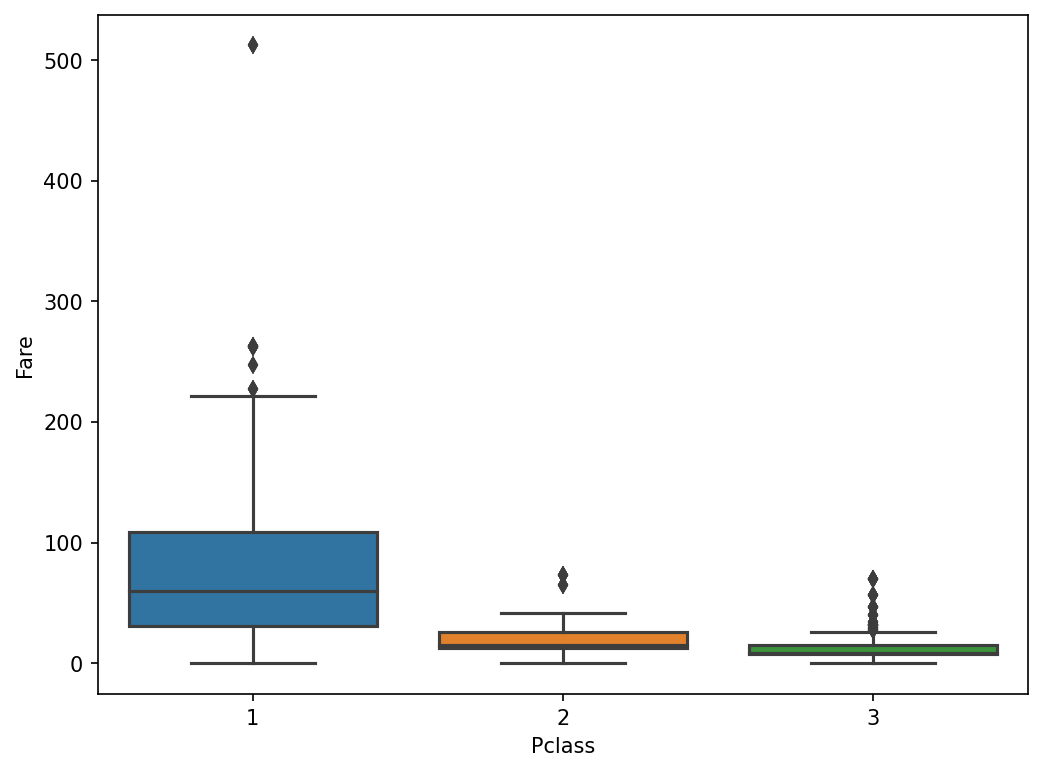

In [180]:
# Relation Between "Fare" and "Pclass"

plt.figure(figsize= (8,6), dpi= 150)

sns.boxplot(data= df, y= "Fare", x= "Pclass")

plt.show()

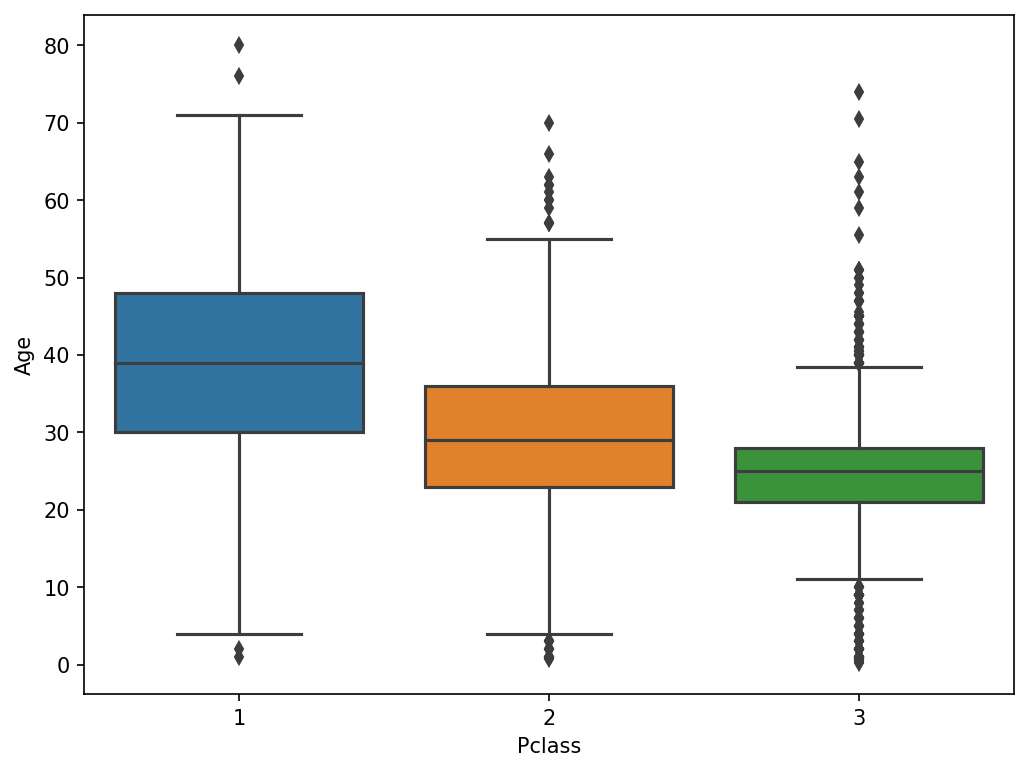

In [181]:
# Relation Between "Fare" and "Pclass"

plt.figure(figsize= (8,6), dpi= 150)

sns.boxplot(data= df, y= "Age", x= "Pclass")

plt.show()

### Dummies for Categorical Variables:

In [182]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [183]:
df["Pclass"].value_counts()

3    708
1    321
2    277
Name: Pclass, dtype: int64

In [184]:
# Class is Ordinal as Class 1 is better than CLass 2 and so on..
# We don't need to create dummies for it.

In [185]:
df["SibSp"].value_counts()

0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [186]:
# This is more of a discrete Numeric Variable than Categorical Variable.

# No need tp Make Dummies for this.

In [187]:
df["Parch"].value_counts()

0    999
1    170
2    113
3      8
5      6
4      6
6      2
9      2
Name: Parch, dtype: int64

In [188]:
# This is more of a discrete Numeric Variable than Categorical Variable.

# No need tp Make Dummies for this.

In [189]:
# "Sex" and "Embarked" are features we need to get Dummiws for.

In [190]:
df = pd.get_dummies(data= df, columns=["Sex","Embarked"], drop_first= True)

In [191]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1


In [192]:
df.shape

(1306, 9)

### Seperating Train and Test Data:

In [194]:
df.shape

(1306, 9)

In [195]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1


In [197]:
# All Rows with "NaN" in "Survived" belongs to Test Data.

train = df.loc[df["Survived"].isna() == False]
test = df.loc[df["Survived"].isna() == True]

In [199]:
train.shape

(889, 9)

In [200]:
test.shape

(417, 9)

In [203]:
# Also, we need to delete "Survived" Column from Test Data

test = test.drop("Survived", axis= 1)

In [204]:
test.shape

(417, 8)

### Train Test Split:

In [205]:
# Features:

x = train.drop("Survived", axis= 1)

In [206]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [207]:
# Target:

y = train["Survived"]

In [208]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [210]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 8)
(178, 8)
(711,)
(178,)


### Scalling:

In [211]:
sc = StandardScaler()

In [212]:
temp = sc.fit_transform(x_train)

In [213]:
x_train = pd.DataFrame(temp, columns= x_train.columns)

In [214]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.584104,-0.553500,-0.474516,-0.475644,2.430597,-1.405310,-0.317205,0.619087
1,0.812275,-0.328742,0.381780,-0.475644,-0.358135,-1.405310,-0.317205,-1.615282
2,0.812275,0.195692,-0.474516,-0.475644,-0.490949,0.711587,-0.317205,0.619087
3,0.812275,-0.328742,6.375852,2.010994,0.762595,-1.405310,-0.317205,0.619087
4,0.812275,-1.152854,3.806964,2.010994,0.301860,0.711587,-0.317205,0.619087


In [215]:
temp = sc.transform(x_test)

In [216]:
x_test = pd.DataFrame(temp, columns= x_test.columns)

In [217]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.812275,-0.103985,-0.474516,-0.475644,-0.492389,0.711587,-0.317205,0.619087
1,-1.584104,-1.152854,0.381780,2.010994,1.788823,-1.405310,-0.317205,0.619087
2,0.812275,-1.152854,0.381780,-0.475644,-0.423482,-1.405310,-0.317205,-1.615282
3,-0.385915,0.045853,-0.474516,-0.475644,-0.387716,0.711587,-0.317205,0.619087
4,-1.584104,-0.853177,-0.474516,2.010994,0.968044,-1.405310,-0.317205,0.619087


### Logistic Regression Using Grid Search CV:

In [219]:
log_model = LogisticRegression(solver="saga", max_iter= 10000)

In [220]:
grid_model = GridSearchCV(estimator= log_model,
                         param_grid= {"penalty" : ["l1", "l2", "elasticnet"], "C" : np.logspace(0, 5, 10),
                                     "l1_ratio" : [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]})

In [221]:
grid_model.fit(x_train, y_train)

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1

GridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'l1_ratio': [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99,
                                      1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [222]:
grid_model.best_estimator_

LogisticRegression(C=3.5938136638046276, l1_ratio=0, max_iter=10000,
                   penalty='l1', solver='saga')

In [223]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006594,0.001360,0.001992,0.000622,1.0,0,l1,"{'C': 1.0, 'l1_ratio': 0, 'penalty': 'l1'}",0.832168,0.830986,0.795775,0.802817,0.774648,0.807279,0.021902,244
1,0.004392,0.000796,0.001197,0.000398,1.0,0,l2,"{'C': 1.0, 'l1_ratio': 0, 'penalty': 'l2'}",0.832168,0.830986,0.795775,0.802817,0.774648,0.807279,0.021902,244
2,0.002995,0.000014,0.001590,0.000484,1.0,0,elasticnet,"{'C': 1.0, 'l1_ratio': 0, 'penalty': 'elasticn...",0.832168,0.830986,0.795775,0.802817,0.774648,0.807279,0.021902,244
3,0.004589,0.000488,0.000996,0.000002,1.0,0.01,l1,"{'C': 1.0, 'l1_ratio': 0.01, 'penalty': 'l1'}",0.832168,0.830986,0.795775,0.802817,0.774648,0.807279,0.021902,244
4,0.003995,0.000010,0.001197,0.000399,1.0,0.01,l2,"{'C': 1.0, 'l1_ratio': 0.01, 'penalty': 'l2'}",0.832168,0.830986,0.795775,0.802817,0.774648,0.807279,0.021902,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.003774,0.000393,0.001197,0.000399,100000.0,0.99,l2,"{'C': 100000.0, 'l1_ratio': 0.99, 'penalty': '...",0.832168,0.830986,0.795775,0.802817,0.781690,0.808687,0.019893,1
266,0.003995,0.000011,0.001192,0.000402,100000.0,0.99,elasticnet,"{'C': 100000.0, 'l1_ratio': 0.99, 'penalty': '...",0.832168,0.830986,0.795775,0.802817,0.781690,0.808687,0.019893,1
267,0.004588,0.000791,0.001204,0.000405,100000.0,1,l1,"{'C': 100000.0, 'l1_ratio': 1, 'penalty': 'l1'}",0.832168,0.830986,0.795775,0.802817,0.781690,0.808687,0.019893,1
268,0.003792,0.000398,0.001195,0.000400,100000.0,1,l2,"{'C': 100000.0, 'l1_ratio': 1, 'penalty': 'l2'}",0.832168,0.830986,0.795775,0.802817,0.781690,0.808687,0.019893,1


In [224]:
grid_model.best_score_

0.8086870875603269

In [225]:
grid_model.best_params_

{'C': 3.5938136638046276, 'l1_ratio': 0, 'penalty': 'l1'}

### Model Evaluation:

In [226]:
pred = grid_model.predict(x_test)

In [227]:
# Accuracy:

accuracy_score(y_test, pred)

0.7921348314606742

In [228]:
# Precision:

precision_score(y_test, pred)

0.7105263157894737

In [229]:
# Recall:

recall_score(y_test, pred)

0.782608695652174

In [230]:
# Confusion Matrix:

confusion_matrix(y_test, pred)

array([[87, 22],
       [15, 54]], dtype=int64)

In [231]:
# Classification Report:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       109
         1.0       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



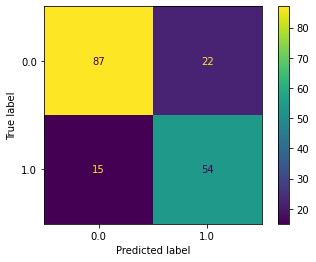

In [232]:
# Plotting Confusion Matrix:

plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

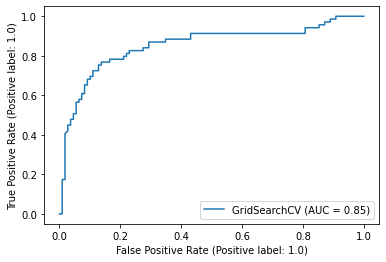

In [233]:
# Plotting ROC Curve:

plot_roc_curve(grid_model, x_test, y_test)
plt.show()

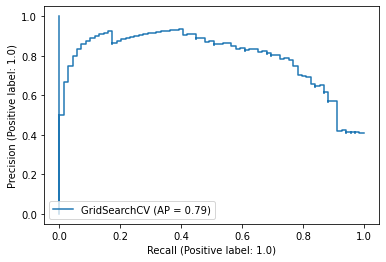

In [234]:
# Plotting Precision Recall Curve:

plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()

### Predictions of Test Data:

In [235]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [236]:
# We need to first scale this data as our Model Training was done using Scaled Data:

temp = sc.transform(test)

In [237]:
test = pd.DataFrame(temp, columns= test.columns)

In [238]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.812275,0.382990,-0.474516,-0.475644,-0.492898,0.711587,3.152533,-1.615282
1,0.812275,1.319480,0.381780,-0.475644,-0.509765,-1.405310,-0.317205,0.619087
2,-0.385915,2.443268,-0.474516,-0.475644,-0.455097,0.711587,3.152533,-1.615282
3,0.812275,-0.178904,-0.474516,-0.475644,-0.475947,0.711587,-0.317205,0.619087
4,0.812275,-0.553500,0.381780,0.767675,-0.402209,-1.405310,-0.317205,0.619087


In [239]:
# Prediction Using Model:

test_pred = grid_model.predict(test)

In [240]:
test_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0.

In [241]:
grid_model.predict_proba(test)

array([[0.90643826, 0.09356174],
       [0.70725836, 0.29274164],
       [0.91369946, 0.08630054],
       [0.90428816, 0.09571184],
       [0.42495347, 0.57504653],
       [0.83202474, 0.16797526],
       [0.3270426 , 0.6729574 ],
       [0.79786752, 0.20213248],
       [0.19014273, 0.80985727],
       [0.940114  , 0.059886  ],
       [0.89542593, 0.10457407],
       [0.65060642, 0.34939358],
       [0.05020602, 0.94979398],
       [0.95893127, 0.04106873],
       [0.15113679, 0.84886321],
       [0.11541435, 0.88458565],
       [0.73435168, 0.26564832],
       [0.81293534, 0.18706466],
       [0.4721692 , 0.5278308 ],
       [0.47273259, 0.52726741],
       [0.72356476, 0.27643524],
       [0.8054257 , 0.1945743 ],
       [0.07576205, 0.92423795],
       [0.25413738, 0.74586262],
       [0.10031599, 0.89968401],
       [0.97794835, 0.02205165],
       [0.02194335, 0.97805665],
       [0.8239927 , 0.1760073 ],
       [0.59111799, 0.40888201],
       [0.92232428, 0.07767572],
       [0.